#### Vemos que hay adentro del file de los subhalos

In [2]:
import h5py
subhalo = h5py.File('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127/fof_subhalo_tab_127.0.hdf5','r')
list(subhalo.get('Header').attrs.keys())

['BoxSize',
 'FlagDoubleprecision',
 'Git_commit',
 'Git_date',
 'HubbleParam',
 'Ngroups_ThisFile',
 'Ngroups_Total',
 'Nids_ThisFile',
 'Nids_Total',
 'Nsubgroups_ThisFile',
 'Nsubgroups_Total',
 'NumFiles',
 'Omega0',
 'OmegaLambda',
 'Redshift',
 'Time']

#### Aca vemos cuantos grupos y subhalos hay en los grupos

In [3]:
Ngroups_Total = subhalo.get('Header').attrs['Ngroups_Total']
print (Ngroups_Total)
Nsubgroups_Total = subhalo.get('Header').attrs['Nsubgroups_Total']
print (Nsubgroups_Total)

132641
81461


#### Aca leo las masas y posiciones de los halos para sacar los mas masivos

In [3]:
%%time
import gc
import h5py
import numpy as np

dir_path = '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127/'

SubMass = []
SubPos  = []
SubR50  = []

for i in range(0,8):
    snap = h5py.File(dir_path + 'fof_subhalo_tab_127.'+ str('%s'%i) +'.hdf5','r')
    
    sub_mass = snap['Subhalo/SubhaloMass'][()]  
    sub_pos  = snap['Subhalo/SubhaloPos'][()]
    sub_r50  = snap['Subhalo/SubhaloHalfmassRad'][()]

    SubMass.append(sub_mass)
    SubPos.append(sub_pos)
    SubR50.append(sub_r50)
    
SubMass = np.concatenate(SubMass)
SubPos  = np.concatenate(SubPos)
SubR50  = np.concatenate(SubR50)

gc.collect()


CPU times: user 106 ms, sys: 156 ms, total: 262 ms
Wall time: 1.85 s


0

#### Seleccionamos los 10 halos mas masivos

In [4]:
mask = np.argsort(SubMass)

SMass = SubMass[mask][::-1]*1e10
SR50  = SubR50[mask][::-1]

print (SMass[:10])
print (SR50[:10])

[1.5752759e+12 1.1699873e+12 5.7578933e+11 5.5521280e+11 2.3570245e+11
 1.8116307e+11 1.6131521e+11 1.4867379e+11 1.4413586e+11 1.4381996e+11]
[0.06842346 0.04551199 0.05081347 0.0416441  0.02460471 0.01982324
 0.02079998 0.02245608 0.02539282 0.02286837]


In [5]:
#Posicion de los 10 halos mas masivos
H_pos = SubPos[mask][::-1]
print (H_pos[:10])

[[48.81521  46.704514 53.605064]
 [48.71576  47.06235  53.33718 ]
 [46.974728 49.455475 51.771206]
 [47.528534 46.364803 54.832882]
 [47.325207 47.259197 51.91327 ]
 [47.791496 47.55743  53.327   ]
 [47.41012  48.306732 52.663097]
 [49.867104 47.25419  52.225414]
 [45.62381  46.928238 54.103687]
 [48.525105 48.03401  51.99552 ]]


#### Leo las posiciones de las particulas y los demas datos

In [6]:
%%time
import gc
import joblib
import h5py
import pathlib
import numpy as np

dir_path = '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127/'

StrPos  = []
StrMass = []
StrVel  = []
StrID   = []
StrMet  = []
StrTMet = []
StrBDen = []
StrBPos = []
StrBVel = []
StrSFT  = []
StrPot  = []

GasPos  = []
GasMass = []
GasVel  = []
GasID   = []
GasMet  = []
GasTMet = []
GasPot  = []

DrkPos  = []
DrkMass = []
DrkVel  = []
DrkID   = []
DrkPot  = []

# Ty2Pos  = []
# Ty2Mass = []

# Ty3Pos  = []
# Ty3Mass = []

for i in range(0,8):
    snap = h5py.File(dir_path + 'snapshot_127.'+ str('%s'%i) +'.hdf5','r')
    
    #stars
    pos_str    = snap['PartType4/Coordinates'][()]
    mass_str   = snap['PartType4/Masses'][()]
    vel_str    = snap['PartType4/Velocities'][()]
    ID_str     = snap['PartType4/ParticleIDs'][()]
    metal_str  = snap['PartType4/GFM_Metals'][()]
    totmet_str = snap['PartType4/GFM_Metallicity'][()]
    bden_str   = snap['PartType4/BirthDensity'][()]
    bpos_str   = snap['PartType4/BirthPos'][()]
    bvel_str   = snap['PartType4/BirthVel'][()]
    bSFT_str   = snap['PartType4/GFM_StellarFormationTime'][()]
    pot_str    = snap['PartType4/Potential'][()]
    
    StrPos.append(pos_str)
    StrMass.append(mass_str)
    StrVel.append(vel_str)
    StrID.append(ID_str)
    StrMet.append(metal_str)
    StrTMet.append(totmet_str)
    StrBDen.append(bden_str)
    StrBPos.append(bpos_str)
    StrBVel.append(bvel_str)
    StrSFT.append(bSFT_str)
    StrPot.append(pot_str)

    #gas
    pos_gas    = snap['PartType0/Coordinates'][()]
    mass_gas   = snap['PartType0/Masses'][()]
    vel_gas    = snap['PartType0/Velocities'][()]
    ID_gas     = snap['PartType0/ParticleIDs'][()]
    metal_gas  = snap['PartType0/GFM_Metals'][()]
    totmet_gas = snap['PartType0/GFM_Metallicity'][()]
    pot_gas    = snap['PartType0/Potential'][()]
    
    GasPos.append(pos_gas)
    GasMass.append(mass_gas)
    GasVel.append(vel_gas)
    GasID.append(ID_gas)
    GasMet.append(metal_gas)
    GasTMet.append(totmet_gas)
    GasPot.append(pot_gas)

    #dark matter
    pos_drk    = snap['PartType1/Coordinates'][()]
    mass_drk   = snap['PartType1/Masses'][()]
    vel_drk    = snap['PartType1/Velocities'][()]
    ID_drk     = snap['PartType1/ParticleIDs'][()]
    pot_drk    = snap['PartType1/Potential'][()]
    
    DrkPos.append(pos_drk)
    DrkMass.append(mass_drk)
    DrkVel.append(vel_drk)
    DrkID.append(ID_drk)
    DrkPot.append(pot_drk)

#     #type2
#     pos_ty2  = snap['PartType2/Coordinates'][()]
#     mass_ty2 = snap['PartType2/Masses'][()]
    
#     Ty2Pos.append(pos_ty2)
#     Ty2Mass.append(mass_ty2)

#     #type3
#     pos_ty3  = snap['PartType3/Coordinates'][()]
#     mass_ty3 = snap['PartType3/Masses'][()]
    
#     Ty3Pos.append(pos_ty3)
#     Ty3Mass.append(mass_ty3)
    
a = snap.get('Header').attrs['Time']
h = snap.get('Header').attrs['HubbleParam']

Omega0   = snap.get('Header').attrs['Omega0']
Omegab   = snap.get('Header').attrs['OmegaBaryon']
OmegaL   = snap.get('Header').attrs['OmegaLambda']
Redshift = snap.get('Header').attrs['Redshift']

Unit_Length = snap.get('Header').attrs['UnitLength_in_cm']
Unit_Mass   = snap.get('Header').attrs['UnitMass_in_g']
Unit_Veloc  = snap.get('Header').attrs['UnitVelocity_in_cm_per_s']

StrPos  = np.concatenate(StrPos)
StrMass = np.concatenate(StrMass)
StrVel  = np.concatenate(StrVel)
StrID   = np.concatenate(StrID)
StrMet  = np.concatenate(StrMet)
StrTMet = np.concatenate(StrTMet)
StrBDen = np.concatenate(StrBDen)
StrBPos = np.concatenate(StrBPos)
StrBVel = np.concatenate(StrBVel)
StrSFT  = np.concatenate(StrSFT)
StrPot  = np.concatenate(StrPot)

GasPos  = np.concatenate(GasPos)
GasMass = np.concatenate(GasMass)
GasVel  = np.concatenate(GasVel)
GasID   = np.concatenate(GasID)
GasMet  = np.concatenate(GasMet)
GasTMet = np.concatenate(GasTMet)
GasPot  = np.concatenate(GasPot)

DrkPos  = np.concatenate(DrkPos)
DrkMass = np.concatenate(DrkMass)
DrkVel  = np.concatenate(DrkVel)
DrkID   = np.concatenate(DrkID)
DrkPot  = np.concatenate(DrkPot)

# Ty2Pos  = np.concatenate(Ty2Pos)
# Ty2Mass = np.concatenate(Ty2Mass)

# Ty3Pos  = np.concatenate(Ty3Pos)
# Ty3Mass = np.concatenate(Ty3Mass)

gc.collect()

CPU times: user 5min 29s, sys: 7min 31s, total: 13min
Wall time: 2min 7s


0

#### Unidades

In [18]:
print('Unit_Length=', Unit_Length) #---> Esto es en cm y equivale a 1Mpc
print('Unit_Mass=', Unit_Mass)  # ---> Esto es en g y equivale a 1e10Msol
print('Unit_Veloc=', Unit_Veloc)# ---> Esto es cm/s y equivale a 1km/s

Unit_Length= 3.085678e+24
Unit_Mass= 1.989e+43
Unit_Veloc= 100000.0


#### Subhalos sin low/int-res particles 

In [7]:
import numpy as np
subh = np.loadtxt('../_data/subhalos.dat')
halo_mask, = np.where((subh[:,15]==0) & (subh[:,16]==0))
subh_name = subh[:,0][halo_mask]

subh_ind = np.int_(subh_name)
nsubh = len(subh_name)

print(subh_ind)
print(nsubh)

[ 0  1  3  4  5  6  7  9 20 21 22 27 28 31 33 35 36 37 38 39 41 42 45 46
 49 50 51 53 54 64 65 66 69 73 74 79 84 85 87 88 90 91 92 95 96]
45


#### Leo masas y radios viriales

In [8]:
import numpy as np
subh = np.loadtxt('../_data/Mvir_Rvir.dat')

Mvir = subh[:,1]
Rvir = subh[:,2]

print(Rvir)

[290.011565 274.65236  195.100671 147.06049  135.865011 131.45413
 123.275893 122.05355 ]


### Guardo los 8 halos mas masivos dentro de 2Rvir

In [10]:
i = 0
for j in subh_ind[:8]:
    print ('subhalo=',str('%03d'%j))
    
    SPos = (StrPos - H_pos[j,:])*1000
    xstr = SPos[:,0]*a/h
    ystr = SPos[:,1]*a/h
    zstr = SPos[:,2]*a/h
    rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)
    kstr, = np.where(rstr < 2*Rvir[i])
    
    GPos = (GasPos - H_pos[j,:])*1000
    xgas = GPos[:,0]*a/h
    ygas = GPos[:,1]*a/h
    zgas = GPos[:,2]*a/h
    rgas = np.sqrt(xgas**2 + ygas**2 + zgas**2)
    kgas,= np.where(rgas < 2*Rvir[i])
    
    DPos = (DrkPos - H_pos[j,:])*1000
    xdrk = DPos[:,0]*a/h
    ydrk = DPos[:,1]*a/h
    zdrk = DPos[:,2]*a/h
    rdrk = np.sqrt(xdrk**2 + ydrk**2 + zdrk**2)
    kdrk,= np.where(rdrk < 2*Rvir[i])
    
#     T2Pos = (Ty2Pos - H_pos[j,:])*1000
#     xty2 = T2Pos[:,0]
#     yty2 = T2Pos[:,1]
#     zty2 = T2Pos[:,2]
#     rty2 = np.sqrt(xty2**2 + yty2**2 + zty2**2)
#     kty2,= np.where(rty2 < 200)
#     print ('Number of PartType2=', len(kty2))
    
#     T3Pos = (Ty3Pos - H_pos[j,:])*1000
#     xty3 = T3Pos[:,0]
#     yty3 = T3Pos[:,1]
#     zty3 = T3Pos[:,2]
#     rty3 = np.sqrt(xty3**2 + yty3**2 + zty3**2)
#     kty3,= np.where(rty3 < 200)
#     print ('Number of PartType3=', len(kty3))

#     if not (np.size(kty2)>0 and np.size(kty3)>0):
    output_file = h5py.File('/z/omarioni/gradients/_simulations/snap_127/subhalo_'+str('%03d'% j)+'.h5py', 'a')

    output_file.create_dataset('/Time',          data = a)
    output_file.create_dataset('/h',             data = h)
    output_file.create_dataset('/Omega_0',       data = Omega0)
    output_file.create_dataset('/Omega_Baryon',  data = Omegab)
    output_file.create_dataset('/Omega_Lambda',  data = OmegaL)
    output_file.create_dataset('/Redshift',      data = Redshift)
    output_file.create_dataset('/Center',        data = H_pos[j,:])
    output_file.create_dataset('/SubHalfmassRad',data = SR50[j])
    output_file.create_dataset('/SubhaloMass',   data = SMass[j])
    output_file.create_dataset('/M200'       ,   data = Mvir[i])
    output_file.create_dataset('/R200'       ,   data = Rvir[i])
    
    i = i+1
    
    output_file.create_dataset('/Str/Coordinates',      data = SPos[kstr,:],   dtype=np.float32)
    output_file.create_dataset('/Str/Masses',           data = StrMass[kstr],  dtype=np.float32)
    output_file.create_dataset('/Str/Velocities',       data = StrVel[kstr,:], dtype=np.float32)
    output_file.create_dataset('/Str/IDs',              data = StrID[kstr])
    output_file.create_dataset('/Str/Metallicity',      data = StrMet[kstr],   dtype=np.float32)
    output_file.create_dataset('/Str/Total_Metallicity',data = StrTMet[kstr],  dtype=np.float32)
    output_file.create_dataset('/Str/Birth_Density',    data = StrBDen[kstr],  dtype=np.float32)
    output_file.create_dataset('/Str/Birth_Position',   data = StrBPos[kstr],  dtype=np.float32)
    output_file.create_dataset('/Str/Birth_Velocities', data = StrBVel[kstr],  dtype=np.float32)
    output_file.create_dataset('/Str/FormationTime',    data = StrSFT[kstr],   dtype=np.float32)
    output_file.create_dataset('/Str/Potential',        data = StrPot[kstr],   dtype=np.float32)


    output_file.create_dataset('/Gas/Coordinates',      data = GPos[kgas,:],   dtype=np.float32)
    output_file.create_dataset('/Gas/Masses',           data = GasMass[kgas],  dtype=np.float32)
    output_file.create_dataset('/Gas/Velocities',       data = GasVel[kgas,:], dtype=np.float32)
    output_file.create_dataset('/Gas/IDs',              data = GasID[kgas])
    output_file.create_dataset('/Gas/Metallicity',      data = GasMet[kgas],   dtype=np.float32)
    output_file.create_dataset('/Gas/Total_Metallicity',data = GasTMet[kgas],  dtype=np.float32)
    output_file.create_dataset('/Gas/Potential',        data = GasPot[kgas],   dtype=np.float32)


    output_file.create_dataset('/Drk/Coordinates',      data = DPos[kdrk,:],   dtype=np.float32)
    output_file.create_dataset('/Drk/Masses',           data = DrkMass[kdrk],  dtype=np.float32)
    output_file.create_dataset('/Drk/Velocities',       data = DrkVel[kdrk,:], dtype=np.float32)
    output_file.create_dataset('/Drk/IDs',              data = DrkID[kdrk])
    output_file.create_dataset('/Drk/Potential',        data = DrkPot[kdrk],   dtype=np.float32)


    output_file.close()

subhalo= 000
subhalo= 001
subhalo= 003
subhalo= 004
subhalo= 005
subhalo= 006
subhalo= 007
subhalo= 009


### Pruebo los archivos que acabo de guardar
#### Grafico con density plots los 3 halos mas masivos

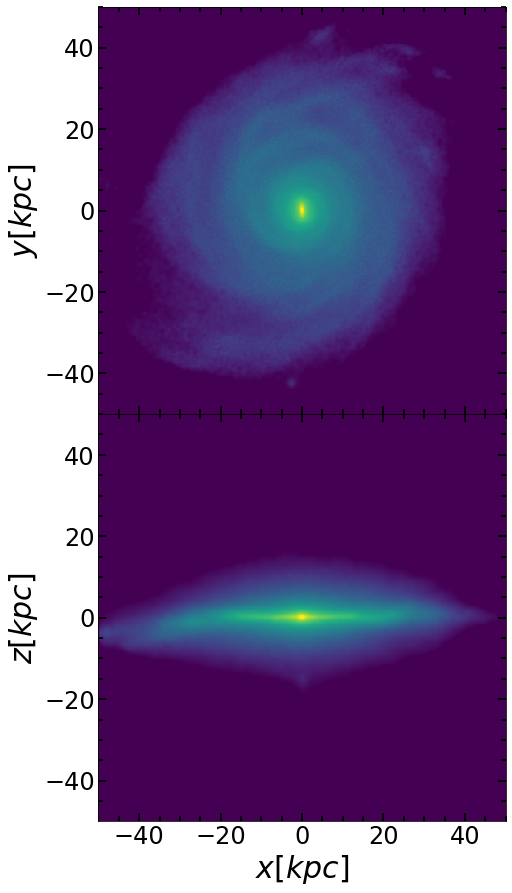

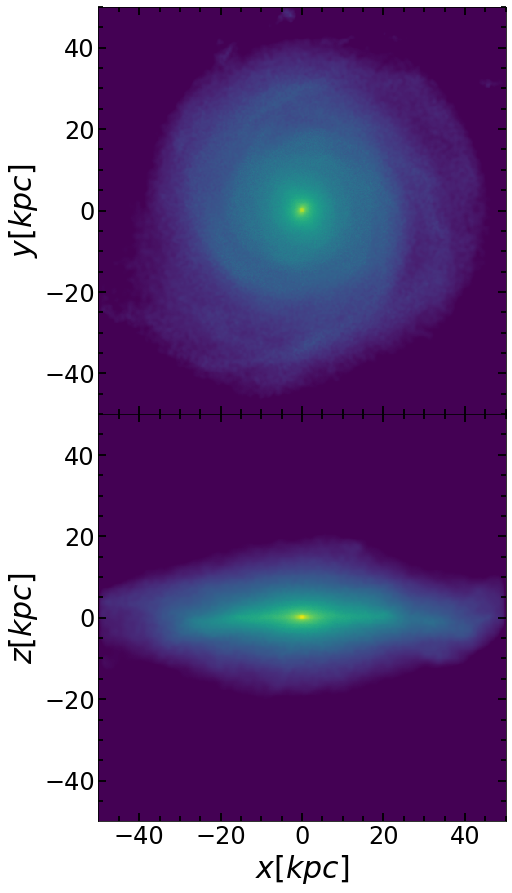

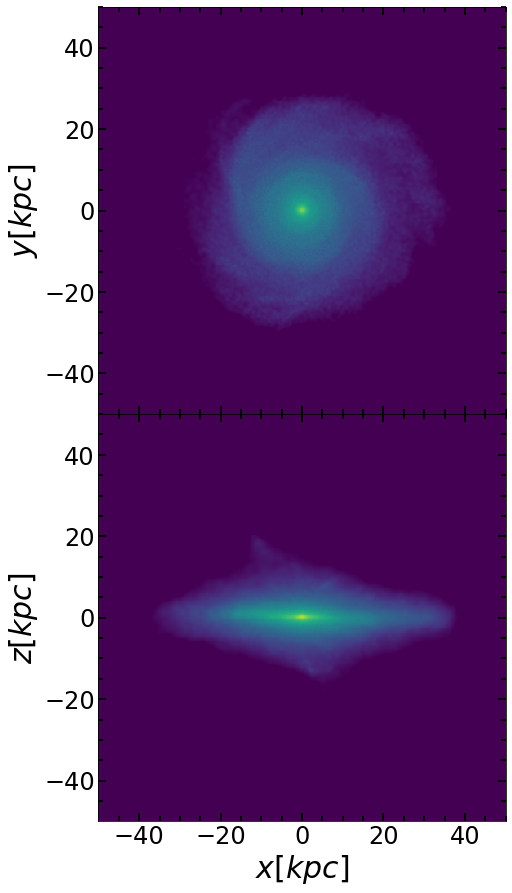

In [15]:
import h5py
import rotation_mio as rot
import sphviewer as sph
import numpy as np
import matplotlib.pyplot as plt

vector = (0,1,3)

path = '../_simulations/snap_127/'

for i in range(0,3):
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%vector[i])+'.h5py', 'r')
    
    cm   = snap['/Center'][()]
    aexp = snap['/Time'][()]
    h    = snap['/h'][()]

    pstr = snap['/Str/Coordinates'][()]
    masa_str = snap['/Str/Masses'][()]
    vel  = snap['/Str/Velocities'][()]

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0])*aexp/h
    ystr = (pstr[:,1])*aexp/h
    zstr = (pstr[:,2])*aexp/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp)
    v_y = vel[:,1] *np.sqrt(aexp)
    v_z = vel[:,2] *np.sqrt(aexp)

#----------------------masas----------------------------
    masa_str = masa_str/h


    veloc,=np.where(r<3)

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
    vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
    vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,5)

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    pos=np.ndarray([np.size(xn),3])
    pos[:,0]=xn
    pos[:,1]=yn
    pos[:,2]=zn

#---------------------generador del gráfico-----------------
    rl=50   
    corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))

#-----rango que tiene la escala  de colores-----
    vmin=6.3
    vmax=9.8

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='viridis'

#-----grafico-----------
    fig=plt.figure(1,figsize=(8,13))
    fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0.03, hspace= 0)

    particles=sph.Particles(pos[corte,:],masa_str[corte]*1e10,nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
    rend1=sph.Render(escena)
    extent=escena.get_extent()
    rend1.set_logscale()

    ax1=fig.add_subplot(211)
    plt.imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    #plt.axis('off')
    #ax1.set_title('Gadget - '+ str('%s'%vector2[i]), fontsize=18)
    ax1.set_xticklabels([])
    #plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
    plt.ylabel('$y[kpc]$', fontsize=30)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=24)
    ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
    ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

    particles=sph.Particles(pos[corte,:],masa_str[corte]*1e10,nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    ax2=fig.add_subplot(212)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    #plt.axis('off')
    plt.xlabel('$x[kpc]$', fontsize=30)
    plt.ylabel('$z[kpc]$', fontsize=30)
    ax2.minorticks_on()
    ax2.tick_params( labelsize=24)
    ax2.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
    ax2.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
    #plt.text(12.5, 12.5, str('%.3f'%t)+'Gyr', fontsize=22, color='white', ha='left', va='top') 
    
    plt.show()
    plt.clf()


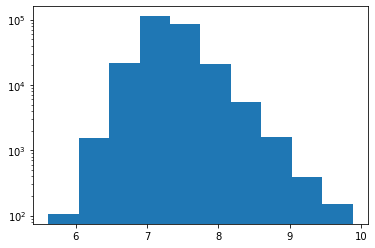

In [53]:
rend1.histogram(log=True)

#### Grafico las estrellas de los subhalos 

subhalo_000
subhalo_001
subhalo_003
subhalo_004
subhalo_005
subhalo_006
subhalo_007
subhalo_009


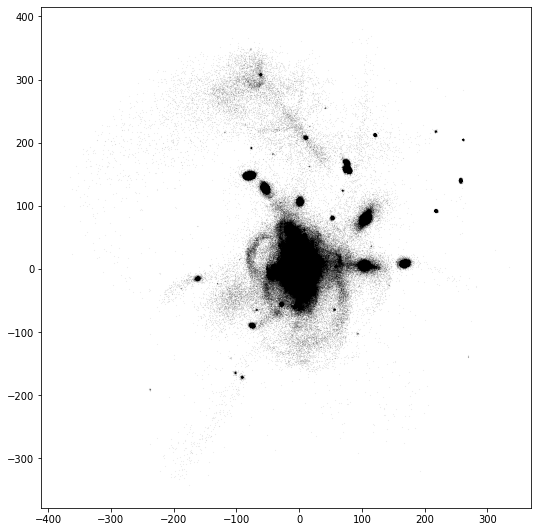

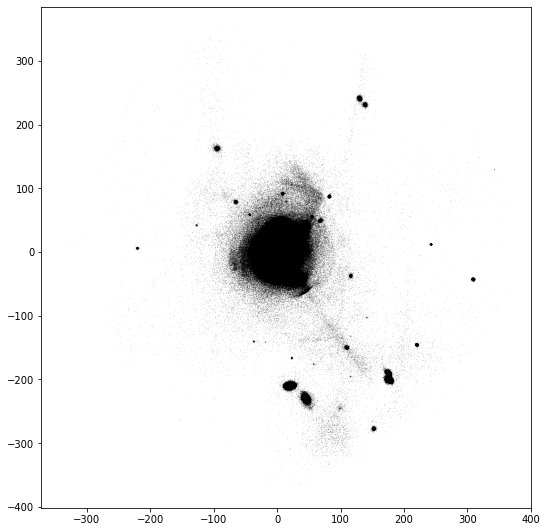

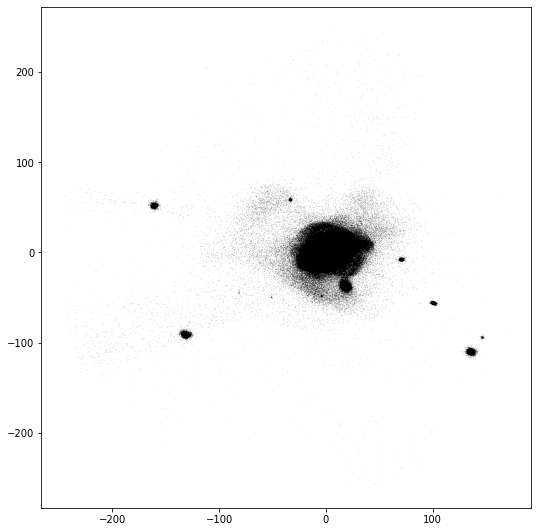

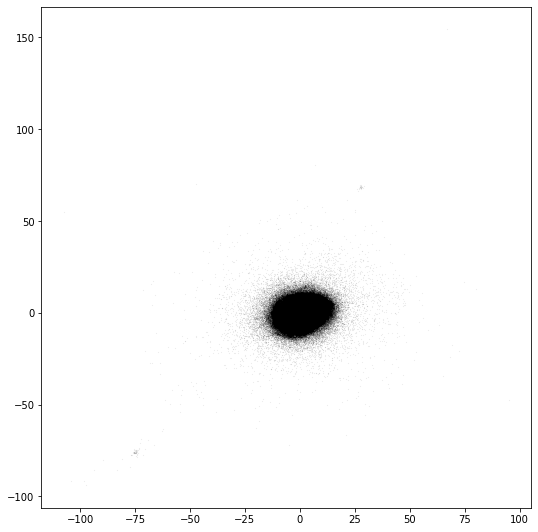

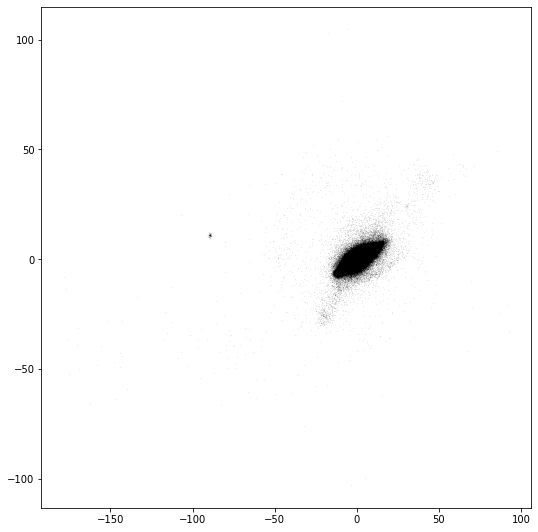

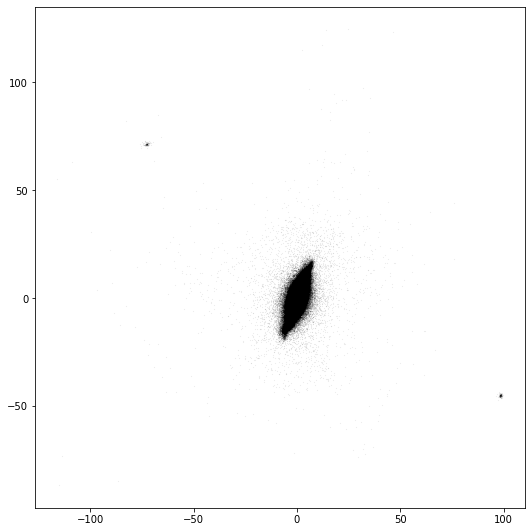

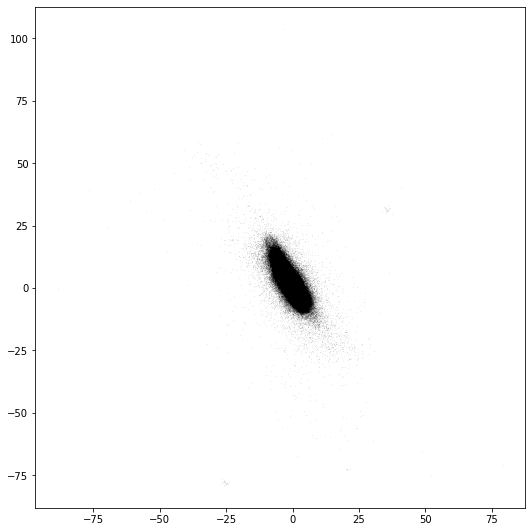

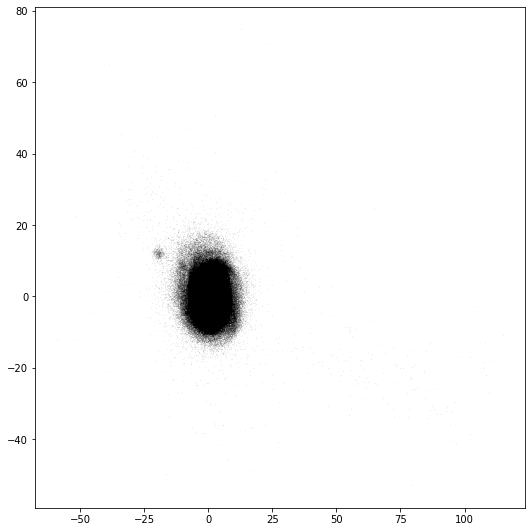

In [16]:
import h5py
import rotation_mio as rot
import sphviewer as sph
import numpy as np
import matplotlib.pyplot as plt


for j in subh_ind[:8]:
    snap = h5py.File('../_simulations/snap_127/subhalo_'+ str('%03d'% j) +'.h5py', 'r')
    
    pstr = snap['/Str/Coordinates'][()]
    
    print('subhalo_'+ str('%03d'% j) )

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)
    ax.plot(pstr[:,0],pstr[:,1],'.k',markersize=0.05)

### Miro que tienen adentro los archivos

In [17]:
snap = h5py.File('../_simulations/snap_127/subhalo_000.h5py', 'r')
def printname(name):
    print (name)
snap.visit(printname)

Center
Drk
Drk/Coordinates
Drk/IDs
Drk/Masses
Drk/Potential
Drk/Velocities
Gas
Gas/Coordinates
Gas/IDs
Gas/Masses
Gas/Metallicity
Gas/Potential
Gas/Total_Metallicity
Gas/Velocities
M200
Omega_0
Omega_Baryon
Omega_Lambda
R200
Redshift
Str
Str/Birth_Density
Str/Birth_Position
Str/Birth_Velocities
Str/Coordinates
Str/FormationTime
Str/IDs
Str/Masses
Str/Metallicity
Str/Potential
Str/Total_Metallicity
Str/Velocities
SubHalfmassRad
SubhaloMass
Time
h


In [20]:
pstr = snap['/Str/Coordinates'][()]

In [21]:
print (np.shape(pstr))

(5882020, 3)
